<a href="https://colab.research.google.com/github/SankeerthShabad/IDS/blob/main/HW3/Project3_ExtraCredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 3: Statistical Analysis on Factors Influencing Life Expectancy**

In [5]:
pip install mysql-connector-python

In [111]:
import mysql.connector as sql

import pandas as pd
from pandas import DataFrame
from tabulate import tabulate

In [7]:
# Connect to MySQL and execute a query

def execute_query(query):
   db_connection = sql.connect(host='208.109.18.154', database='ids17db', user='ids17', password='Kjw9012')
   db_cursor = db_connection.cursor()
   db_cursor.execute(query)
   results = db_cursor.fetchall()

   return results


In [8]:
# Create a dataframe for the cleaned life expectancy dataset
# We are assuming all missing values were imputed in MySQL

# execute query and fetch results
results = execute_query('SELECT * FROM Life_Expectancy')

# create the dataframe
LifeExpectancyDF = pd.DataFrame(results)

# name the columns
LifeExpectancyDF.columns = ['Country', 'Year', 'Life_Expectancy','Adult_Mortality','Alcohol',
                            'Percentage_Expenditure','BMI','Total_Expenditure','GDP','Population','Schooling']

# print a few rows
LifeExpectancyDF.head()




,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0


# **Part I: MySQL (16 points)**

## **(1) Display total count of countries after data cleaning.**

In [9]:
# distinct number of countries

LifeExpectancyDF.Country.nunique()



145

In [10]:
# execute query and fetch results
num_countries = execute_query('SELECT count(distinct Country) FROM Life_Expectancy')

print(num_countries)



[(145,)]


## **(2) List of countries with the highest and lowest average mortality rates.**

* SELECT Country, avg(Adult_Mortality)
* from Life_Expectancy
* group by Country
* order by avg(Adult_Mortality) asc limit 1;

In [11]:
# execute query and fetch results
lowest = execute_query('SELECT Country, avg(Adult_Mortality) from Life_Expectancy group by Country order by avg(Adult_Mortality) asc limit 1')
highest = execute_query('SELECT Country, avg(Adult_Mortality) from Life_Expectancy group by Country order by avg(Adult_Mortality) desc limit 1')

print("Lowest average mortality rate: ", lowest)
print("Highest average mortality rate: ", highest)





Lowest average mortality rate:  [('Tunisia', Decimal('10.6667'))]
Highest average mortality rate:  [('Lesotho', Decimal('436.0000'))]


**Extra** **credit**

In [136]:
lowestDF = LifeExpectancyDF.groupby('Country').agg({'Adult_Mortality': ['mean']})
lowestDF.loc[lowestDF.idxmax()]

,Adult_Mortality
,mean
Country,
Lesotho,436.0


In [137]:
lowestDF.loc[lowestDF.idxmin()]

,Adult_Mortality
,mean
Country,
Tunisia,10.666667


In [13]:
# Redo the groupings in Pandas

lowestDF = LifeExpectancyDF.groupby('Country').agg({'Adult_Mortality': ['mean']}).min()
highestDF = LifeExpectancyDF.groupby('Country').agg({'Adult_Mortality': ['mean']}).max()

print(lowestDF)
print(highestDF)




Adult_Mortality  mean    10.666667
dtype: float64
Adult_Mortality  mean    436.0
dtype: float64


## **(3) List of countries with the highest and lowest average population.** 

In [14]:
# execute query and fetch results
lowest = execute_query('SELECT Country, avg(Population) from Life_Expectancy group by Country order by avg(Population) asc limit 1')
highest = execute_query('SELECT Country, avg(Population) from Life_Expectancy group by Country order by avg(Population) desc limit 1')

print("Lowest average population rate: ", lowest)
print("Highest average population rate: ", highest)




Lowest average population rate:  [('Palau', Decimal('292.0000'))]
Highest average population rate:  [('India', Decimal('281099848.5000'))]


## **(4) List of countries with the highest and lowest average GDP.**

In [15]:
# execute query and fetch results
lowest = execute_query('SELECT Country, avg(GDP) from Life_Expectancy group by Country order by avg(GDP) asc limit 1')
highest = execute_query('SELECT Country, avg(GDP) from Life_Expectancy group by Country order by avg(GDP) desc limit 1')

print("Lowest average GDP rate: ", lowest)
print("Highest average GDP rate: ", highest)



Lowest average GDP rate:  [('Senegal', 94.40303758333334)]
Highest average GDP rate:  [('Switzerland', 70817.14495)]


## **(5) List of countries with the highest and lowest average Schooling.**


In [16]:
# execute query and fetch results
lowest = execute_query('SELECT Country, avg(Schooling) from Life_Expectancy group by Country order by avg(Schooling) asc limit 1')
highest = execute_query('SELECT Country, avg(Schooling) from Life_Expectancy group by Country order by avg(Schooling) desc limit 1')

print("Lowest average schooling rate: ", lowest)
print("Highest average schooling rate: ", highest)




Lowest average schooling rate:  [('Eritrea', 5.05)]
Highest average schooling rate:  [('Australia', 20.083333333333332)]


## **(6) Which countries have the highest and lowest average alcohol consumption?**

In [17]:
# execute query and fetch results
lowest = execute_query('SELECT Country, avg(alcohol) from Life_Expectancy group by Country order by avg(alcohol) asc limit 1')
highest = execute_query('SELECT Country, avg(alcohol) from Life_Expectancy group by Country order by avg(alcohol) desc limit 1')

print("Lowest average alcohol consumption rate: ", lowest)
print("Highest average alcohol consumption rate: ", highest)



Lowest average alcohol consumption rate:  [('Afghanistan', 0.01)]
Highest average alcohol consumption rate:  [('Belarus', 13.378333333333332)]


## **(7) Do densely populated countries tend to have lower life expectancy?**

* As shown below, Sierra Leone with population of 1.7e+06 has LE of
expectancy ~50 while Germany has LE of almost 85 with a population of 1.79e+07


In [18]:
# execute query and fetch results
results1 = execute_query(' SELECT Country, avg(Population), avg(Life_Expectancy) ALE from Life_Expectancy group by Country ORDER BY ALE ASC limit 1')
results2 = execute_query(' SELECT Country, avg(Population), avg(Life_Expectancy) ALE from Life_Expectancy group by Country ORDER BY ALE DESC limit 1')

print(tabulate(results1))
print(tabulate(results2))




------------  -----------  -------
Sierra Leone  1.68822e+06  49.9667
------------  -----------  -------
-------  -----------  -------
Germany  1.79199e+07  84.6667
-------  -----------  -------


# **Part II: Python (24 Points)**

In [19]:
# summary of the attribues

LifeExpectancyDF.describe()




,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,8.560000e+02,856.000000
mean,2012.496495,70.537430,158.870327,4.178458,1011.071696,39.870327,6.038026,7730.711121,1.335176e+07,12.644042
std,1.707907,8.886691,111.048267,3.795497,2327.538535,20.585439,2.409102,14796.802371,5.362515e+07,2.973853
min,2010.000000,36.300000,1.000000,0.010000,0.108056,2.000000,0.760000,8.376432,4.100000e+01,4.500000
25%,2011.000000,63.800000,70.500000,0.430000,67.694359,22.175000,4.752500,686.911106,2.483085e+05,10.600000
50%,2012.500000,72.700000,141.000000,3.570000,371.111647,45.000000,5.400000,2616.285584,1.515082e+06,12.700000
75%,2014.000000,76.200000,227.250000,6.892500,862.888706,58.500000,7.530000,7130.859259,8.276836e+06,14.800000
max,2015.000000,89.000000,682.000000,17.310000,19479.911610,83.300000,16.610000,119172.741800,1.293859e+09,20.400000


### **Data Visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8273217bd0>,
      dtype=object)

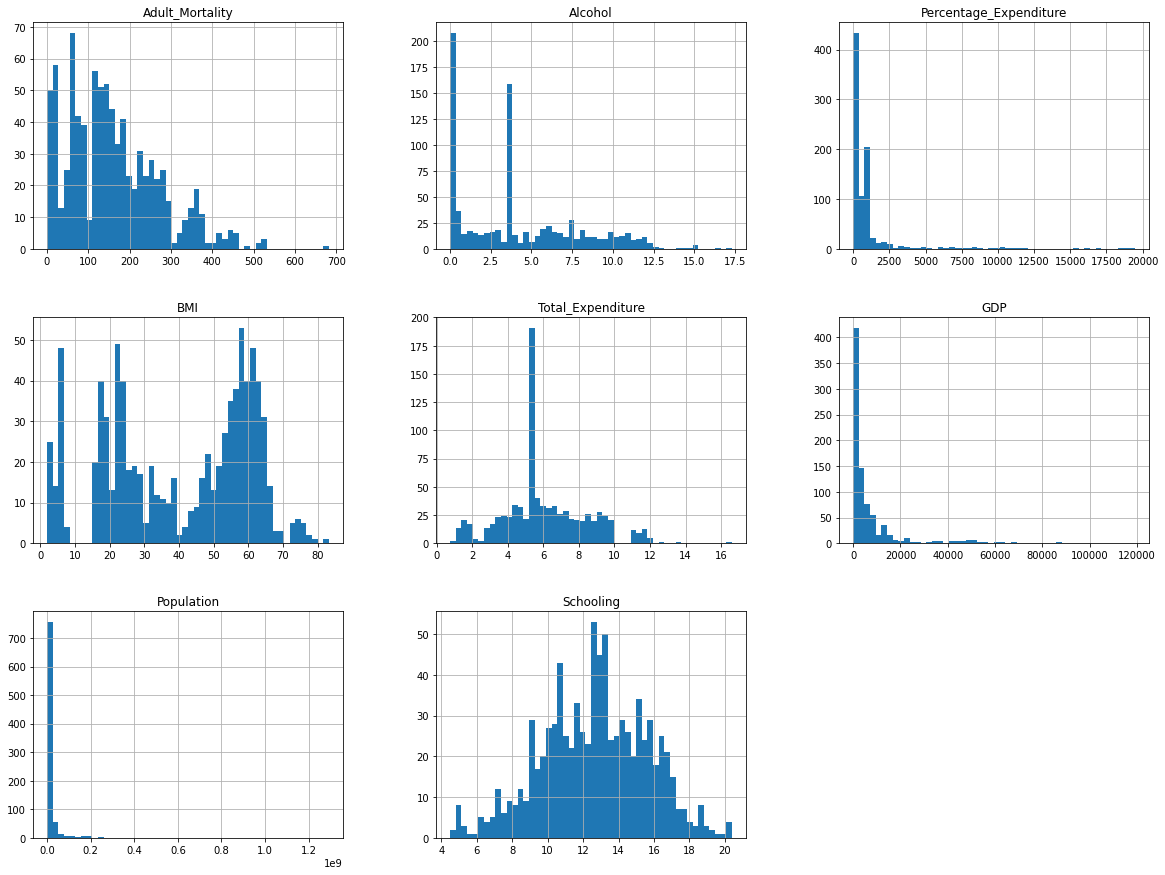

In [20]:
# histograms of numeric attributes

LifeExpectancyDF.hist(bins=50, figsize=(20,15), column=['Adult_Mortality', 'Alcohol', 'Percentage_Expenditure', 'BMI', 'Total_Expenditure', 'GDP', 'Population', 'Schooling'])



## **Pearson-r Correlations**



In [21]:
# Sort the values to see which attributes have strong and weak relationships with LE

corr_matrix = LifeExpectancyDF.corr()
corr_matrix['Life_Expectancy'].sort_values(ascending=False)




Life_Expectancy           1.000000
Schooling                 0.803615
BMI                       0.522202
GDP                       0.465815
Alcohol                   0.435183
Percentage_Expenditure    0.392184
Total_Expenditure         0.229150
Year                      0.061103
Population               -0.033478
Adult_Mortality          -0.748739
Name: Life_Expectancy, dtype: float64

### **Note**

* Schooling seems to be highly correlated with life expectancy
* BMI, GDP, GDP, Alcohol, etc. have a mild correlation with Life Expectancy
* Adult Mortality has a rather strong negative correlation with LE


In [22]:
# draw the heatmap of the correlation matrix

corr_matrix.style.background_gradient()





,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
Year,1.000000,0.061103,-0.031863,-0.164927,-0.008085,0.051677,-0.081335,-0.013141,0.023245,0.060444
Life_Expectancy,0.061103,1.000000,-0.748739,0.435183,0.392184,0.522202,0.229150,0.465815,-0.033478,0.803615
Adult_Mortality,-0.031863,-0.748739,1.000000,-0.227662,-0.249663,-0.386093,-0.132522,-0.297913,0.024512,-0.552962
Alcohol,-0.164927,0.435183,-0.227662,1.000000,0.386903,0.270719,0.256727,0.419697,-0.029066,0.534065
Percentage_Expenditure,-0.008085,0.392184,-0.249663,0.386903,1.000000,0.214206,0.271508,0.904076,-0.032225,0.385215
BMI,0.051677,0.522202,-0.386093,0.270719,0.214206,1.000000,0.162463,0.271631,-0.074999,0.501895
Total_Expenditure,-0.081335,0.229150,-0.132522,0.256727,0.271508,0.162463,1.000000,0.259113,-0.069817,0.246330
GDP,-0.013141,0.465815,-0.297913,0.419697,0.904076,0.271631,0.259113,1.000000,-0.028964,0.479472
Population,0.023245,-0.033478,0.024512,-0.029066,-0.032225,-0.074999,-0.069817,-0.028964,1.000000,-0.048138
Schooling,0.060444,0.803615,-0.552962,0.534065,0.385215,0.501895,0.246330,0.479472,-0.048138,1.000000


## **Regression Models**

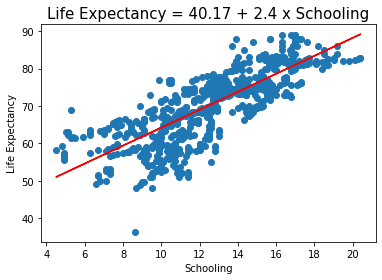

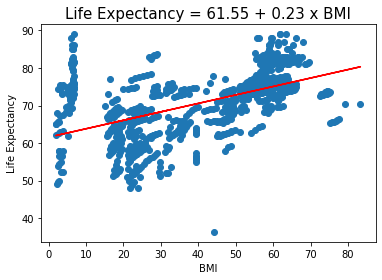

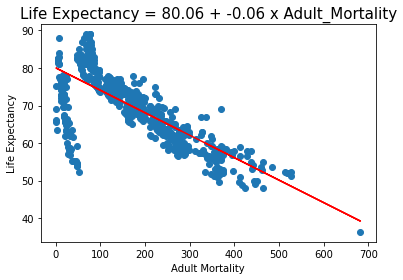

In [23]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#######################################################
# Model 1: Life_Expectancy vs. Schooling
#######################################################
X1 = LifeExpectancyDF.loc[:, 'Schooling'].values.reshape(-1,1)
Y1 = LifeExpectancyDF.loc[:, 'Life_Expectancy'].values.reshape(-1,1)
LRmodel1 = LinearRegression()

# fit the model and make predictions
LRmodel1.fit(X1, Y1)
Y1_pred = LRmodel1.predict(X1)


#######################################################
# Model 2: Life_Expectancy vs. BMI
#######################################################
X2 = LifeExpectancyDF.loc[:, 'BMI'].values.reshape(-1,1)
LRmodel2 = LinearRegression()

# fit the model and make predictions
LRmodel2.fit(X2, Y1)
Y2_pred = LRmodel2.predict(X2)

#######################################################
# Model 3: Life_Expectancy vs. Adult Mortality
#######################################################
X3 = LifeExpectancyDF.loc[:, 'Adult_Mortality'].values.reshape(-1,1)
LRmodel3 = LinearRegression()

# fit the model and make predictions
LRmodel3.fit(X3, Y1)
Y3_pred = LRmodel3.predict(X3)


#######################################################
# plot all three regression models
#######################################################
plt.scatter(X1, Y1)
plt.plot(X1, Y1_pred, color='red')
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy")
title1 = "Life Expectancy = " + str(round(LRmodel1.intercept_[0],2)) + " + " + str(round(LRmodel1.coef_[0][0],2)) + " x Schooling"
plt.title(title1, fontsize=15)
plt.show()



plt.scatter(X2, Y1)
plt.plot(X2, Y2_pred, color='red')
plt.xlabel("BMI")
plt.ylabel("Life Expectancy")
title1 = "Life Expectancy = " + str(round(LRmodel2.intercept_[0],2)) + " + " + str(round(LRmodel2.coef_[0][0],2)) + " x BMI"
plt.title(title1, fontsize=15)
plt.show()



plt.scatter(X3, Y1)
plt.plot(X3, Y3_pred, color='red')
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy")
title1 = "Life Expectancy = " + str(round(LRmodel3.intercept_[0],2)) + " + " + str(round(LRmodel3.coef_[0][0],2)) + " x Adult_Mortality"
plt.title(title1, fontsize=15)
plt.show()




## **Model Comparisons**
* Compute MSE values 
* Compute R2 scores
* Plot the results



In [24]:
# Summarize the findings for all models

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# model 1 MSE and r2 values
m1_mse = mean_squared_error(Y1, Y1_pred)
m1_r2 = r2_score(Y1, Y1_pred)


# model 2 MSE and r2 values
m2_mse = mean_squared_error(Y1, Y2_pred)
m2_r2 = r2_score(Y1, Y2_pred)

# model 3 MSE and r2 values
m3_mse = mean_squared_error(Y1, Y3_pred)
m3_r2 = r2_score(Y1, Y3_pred)






### **Model R2 Values**


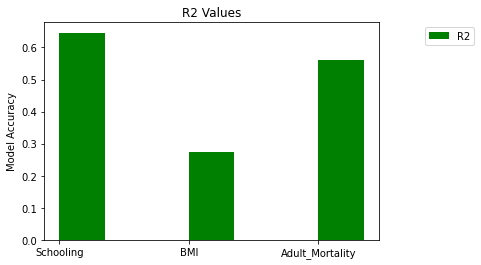

In [25]:
# prepare these for plotting

labels = ['Schooling', 'BMI', 'Adult_Mortality']
mse_values = [m1_mse, m2_mse, m3_mse]
r2_values =  [m1_r2,  m2_r2,  m3_r2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, r2_values, width, label='R2', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
#ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('R2 Values')
plt.show()



### **Model MSE Values**

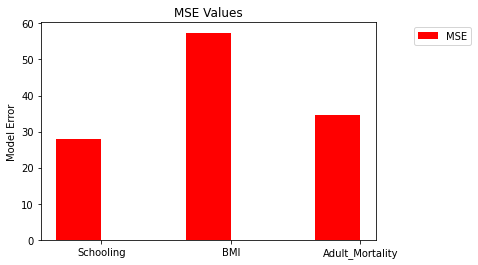

In [26]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_values, width, label='MSE', color='red')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Error')
ax.set_xticks(x)
#ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('MSE Values')
plt.show()




## **Regression Model Comparisons**

* Model 1 with **Schooling** has the largest R2 score and the lowest MSE value.
* Model 2 with **BMI** has the lowest R2 score and the highest MSE value.
* Models 1 and 3 make comparabale predictions.